### Correction TP : Traitement du Signal
## Objectif

L'objectif de ce TP est de mesurer la vitesse du son en utilisant le matériel fourni.

## Matériel

- Haut-parleur
- Deux microphones
- Ordinateur avec Python et Jupyter Notebook installés

## Questions

1. Quel est le but de ce TP ?
2. Quel est le matériel nécessaire pour réaliser cette expérience ?
3. Comment peut-on mesurer la vitesse du son ?
4. Pourquoi doit-on utiliser une intercorrélation pour isoler le signal envoyé par l'haut-parleur ?
5. Comment peut-on minimiser les bruits captés par les microphones ?

## Code

Voici le code Python à utiliser pour générer les signaux et enregistrer le son :

```
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip


traitesignfip.record_microphone("noise") #Acquisition du son des microphones durant 5 secondes, l'haut-parleur émet le son passé en argument pendant 1 seconde

left,right = traitesignfip.read_signal('enregistrement.wav')

#La ligne ci-dessus permet de séparer les deux canaux (Left and Right) car chacun des 2 micros enregistre sur un canal différent. 
#Ainsi deux tableaux permettent de traiter les valeurs de chaque micro. (Tableaux 'left' et 'right')
```


# 1.Quel est le but de ce TP ?

Le but de ce TP est de se familiariser avec le traitement du signal, la mesure de la vitesse du son permet de réunir les éléments de base en traitement du signal.

# 2.Quel est le matériel nécessaire pour réaliser cette expérience ?

Le matériel nécessaire à ce TP est un Haut-parleur, et deux microphones. 

# 3.Comment peut-on mesurer la vitesse du son ?

Nous pouvons mesurer la vitesse du son en envoyant un son avec un haut-parleur. Deux microphones pourront acquérir le signal, en connaissant la distance entre les deux microphones nous pourrons déduire la vitesse du son.

$$ v = \frac{d}{t} $$

où $v$ est la vitesse du son, $d$ est la distance entre les deux microphones et $t$ est le temps que met le son pour parcourir cette distance.

# 4. Pourquoi doit-on utiliser une intercorrélation pour isoler le signal envoyé par l'haut-parleur ?

Nous devons utiliser une intercorrélation pour faire un filtrage adapté afin d'isoler ce que l'haut-parleur envoie vers les microphones. En effet le filtrage adapté définit par : 

$$
R_{xy}[m] = \sum_{n=-\infty}^{+\infty} x[n+m] y[n]
$$

Où x et y sont des signaux connues, en l'occurence y sera le signal capturé par le microphone et x le son émis par l'haut-parleur.

# Code python permettant de réaliser la mesure du son

ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred
ALSA lib pcm.c:8526:(snd_pcm_recover) underrun occurred


Temps PIC Gauche : 3.474807256235828
Temps PIC Droit : 3.476485260770975
Delta : 0.001678004535146993
Vitesse : 297.97297297304385 m/s


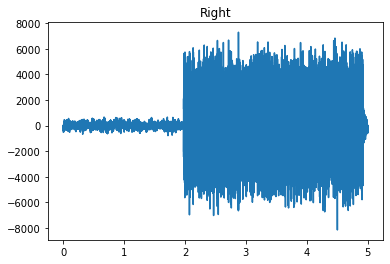

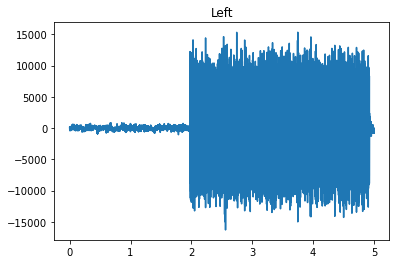

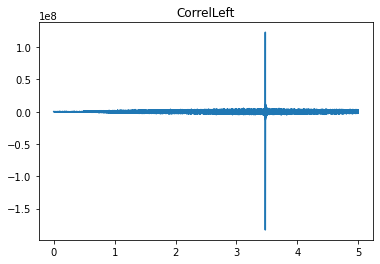

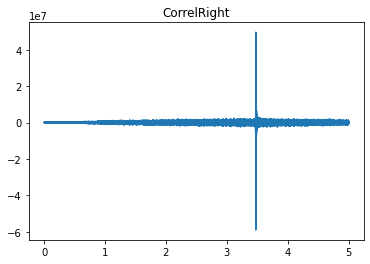

In [7]:
# Importer les bibliothèques nécessaires
# Gestion du son
import sounddevice as sd
import soundfile as sf
# Bibliothèques pour analyse traitement du signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np
#Bibliothèques pour générer, acquérir les sons
import traitesignfip
from importlib import reload
reload(traitesignfip)

traitesignfip.record_microphone("noise",2)

data_left, data_right = traitesignfip.read_signal('enregistrement.wav')

fs = 44100 # fréquence d'échantillonage
N=len(data_left) #nombre d'échantillions 
n = np.arange(0,N)/fs   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 

distance=0.50#Distance entre les deux micros en mètre

#affichage du channel 1 
plt.figure()
plt.title("Right")
plt.plot(n,data_right)
plt.figure()
plt.title("Left")
plt.plot(n,data_left)

corrLeft=np.correlate(data_left,traitesignfip.samples, mode='same')
corrRight=np.correlate(data_right,traitesignfip.samples, mode='same')
# Calcul de la corrélation croisée entre les deux signaux

plt.figure()
plt.title("CorrelLeft")
plt.plot(n,corrLeft)
#Intercorrélation gauche 
plt.figure()
plt.title("CorrelRight")
plt.plot(n,corrRight)
#Intercorrélation droite 

# Trouver l'indice du maximum de la corrélation
max_index_Left = np.argmax(corrLeft)/fs
max_index_Right = np.argmax(corrRight)/fs

delta_t = np.abs(max_index_Left - max_index_Right)

print("Temps PIC Gauche : "+str(max_index_Left))
print("Temps PIC Droit : "+str(max_index_Right))

print("Delta : "+str(delta_t))
print("Vitesse : "+str(distance/delta_t)+" m/s")
